In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [16]:
boston = load_boston()
train = boston.data
y = boston.target

scaler = StandardScaler()
train = scaler.fit_transform(train)

In [17]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

p_values = np.linspace(1, 10, 200)
knn_metric_params = {
    'p': p_values
}

knnRegr = KNeighborsRegressor(n_neighbors=5, weights='distance')
grid = GridSearchCV(knnRegr, param_grid=knn_metric_params, cv=cv, scoring='neg_mean_squared_error')

In [22]:
grid.fit(train, y)
np.sqrt(abs(grid.best_score_)), grid.best_params_

(4.003829009113856, {'p': 1.0})

In [19]:
y.mean()

22.532806324110677

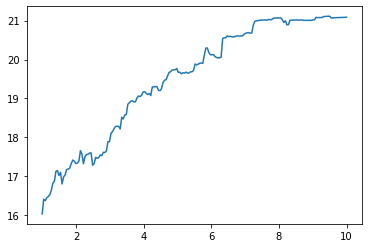

In [32]:
plt.plot(p_values, abs(grid.cv_results_['mean_test_score']));